# Machine Learning @ UWr 2020

**Lecture 01**

## What is Machine Learning?

Hello and welcome to the Machine Learning (ML) 2020 class!

Before we begin to learn all the tiny details about ML models, let's first understand where ML can be used.

As its name suggests, ML describes ways in which a Machine, that is a computer, learns, or in other words discovers how to solve a problem that we supply to it.

What does it mean?

Usually, when we want the computer to solve a task, we must first come up with an algorithm, that is with a sequence of simple operations that will accomplish the task at hand. Then, we implement the algorithm using our programming language of choice. The computer executes our algorithm - precisely and tirelessly, but without any will of its own.

ML is also about solving tasks, however we define these with _data_: instead of describing to a computer what it _must do_ to solve a task, we supply it with examples of task. The machine then has to find a procedure that will match our examples.

This will become clearer with a few examples.

### Example: Computer Vision

Consider these two superficially [similar problems](https://xkcd.com/1425/):
1. In-Out: given an image of a rectangle, determine if a point is inside, or outside of it
2. Bird-Spotting: given a photograph, tell if it contains a bird

Think how you could solve them!

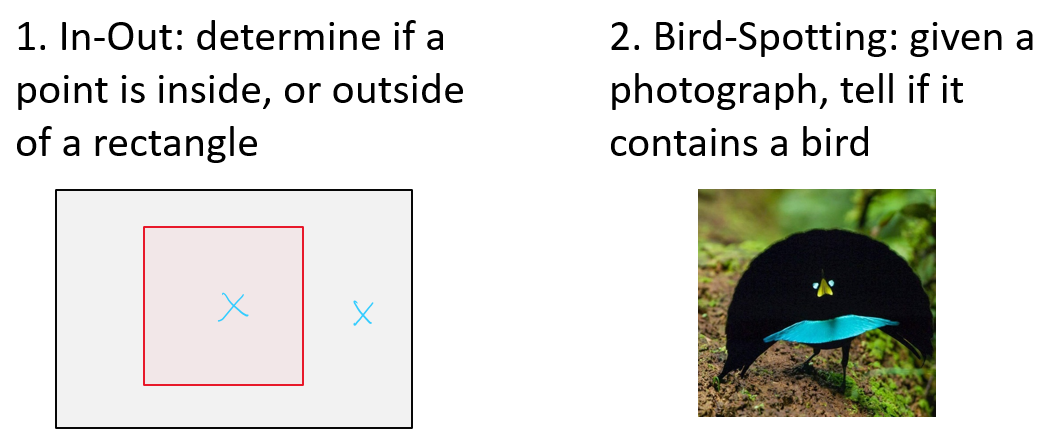

#### In-Out: the algorithmic task
The first problem can be rigorously defined: the input is grid of pixels, with a known size. Some of the pixels (the rectangle's boundary) are black, there is exactly one blue pixel (the query point), each black pixel has two black neighbors (out of 4), seen as a graph of pixels the two black pixels separate the white ones into two connected components, etc. These formally defined properties of input images allow formulation of algorithms: we could, for instance, start coloring pixels neighboring the query pixel until we reach the border of the rectangle, which we do not cross. When we have stopped coloring pixels, the query point is:
- inside the rectangle if we didn't reach the image's border
- outside the rectangle if we did reach it.
Some other solution might look at the coordinates of the rectangle's edges, then use linear algebra to test on which side of the edges the query point and use it to tell on which side is the query pixel.

This is an algorithmic problem: we can formally define all entities we will be dealing with, then write down the solution as a sequence of simple steps. Our solution will return the correct result for any valid input image, and we can precisely tell when an image is valid.

#### Bird-spotting: the ML task
On the other hand, the second problem is only superficially similar to the first: the input to the program is again an image, or a grid of pixels. However, we can't easily formalize any more of its properties: for instance, what does it mean that the pixels show a photograph (How to define a photograph? Does it matter if someone inputs a drawing? Can it be grayscale? Can it be altered?)? The task of finding the bird is also difficult to specify:
- We could e.g. define the bird as a contiguous part of the image, which also contains feathers, wings, a beak... However, then we must define the bird-body parts. 

As you can see, we can't easily create a rigorous definition for this problem. Yet, paraphrasing the infamous [encyclopedia](https://en.wikipedia.org/wiki/Nowe_Ateny) "a bird is as everyone can see". Thus while we can't formally define our task, we can produce millions of examples that demonstrate the intended behavior. We will call them a *dataset*.


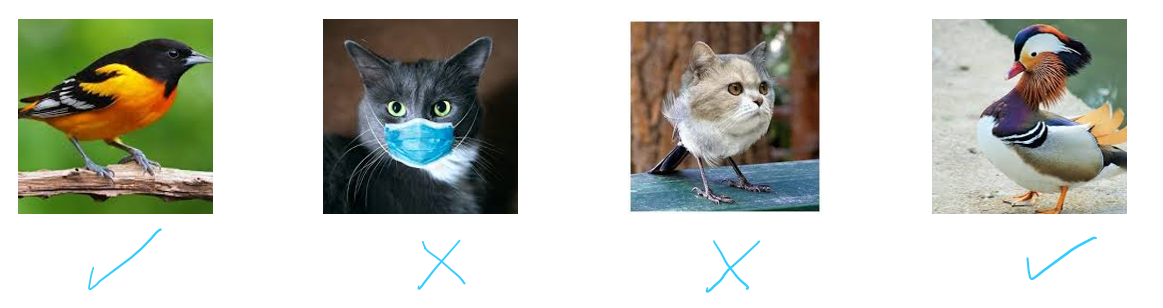

The introduction of the dataset is liberating, suddenly we can use it to formulate claims about our model's intended, or actual behavior, such as:
- the model correctly classifies 95% of samples _in the dataset_
- the model correctly classifies 80% of samples _in a similar dataset, not used for model construction_

Finally, our task becomes less abstract: given the dataset of examples, namely pairs of inputs and outputs, write a computer program that will work in a similar way on new examples similar to the ones in the original dataset. 

## ML and behavioral imitation

To formalize the Bird-spotting task we had to introduce a dataset of images, each annotated with a binary label indicating the presence of a bird in it. If fact, it is this dataset which defines our task:

> The Bird-spotting task is to find a program that returns with high probability the correct label when applied to images like the ones in the dataset.

The dataset also allows us to formulate algorithms that solve the task. We could for instance:
- Compare a query (or test) image to the ones in our dataset, find the most similar and return its label.

Thus, in the ML view of the world there are two processes:
1. The data generating process, e.g. `photographs -> human labelers -> yes/no labels`.
2. The ML solution, which mimics the behavior of the data generating process.

### Predictions and Generalization

A ML model thus uses data during two steps:
1. model creation (also called training), when it uses the data to approximate the relation in it
2. model evaluation, when it uses the data to make claims about its quality.

Obviously, simply remebering all datapoints trivially makes a model 100% accurate on the data it has remembered. However, our end goal is to do well on new data, that will be similar, but not identical to the dataset used to create the model.

Thus, the two uses of data usually necessitate the creation of two datasets:
1. a **training dataset** is used to construct a model
2. a **testing dataset** is used to evaluate a given model

Training and testing datasets must be similar, but not identical: we want the model to find a solution which can **generalize** from the train set, to the test set.

### Summary

In conclusion, Machine Learning deals with tasks for which the intended behavior is specified using a testing/evaluation dataset and for which a solution is created by observing patterns of behavior occurring in a training dataset.

Let me restate it: the datatset is the very problem definition. Claims like "my model is 90% good at doing XYZ" are moot unless they refer to a dataset on which they were obtained. In ML data is like code: it drives and defines model's behavior.

#### Bird-spotting continued

Let us continue the Bird-spotting example. You want to follow a [leading cellphone's manufacturer](https://www.phonearena.com/news/Is-the-Moon-Mode-on-the-Huawei-P-30-Pro-faking-parts-of-photographs_id115554) and make an app which "enhances" bird's photos your user may take to look like [Dodo](https://en.wikipedia.org/wiki/Dodo). After all, pics or it didn't happen! Your first step is to define a dataset that will be used to detect enhanceable birds in the pictures.

First, you collect a dataset which will define the functionality of your model. It has to reflect the intended use, for instance it should have many different birds in different situations (some flying, some standing, with varied backgrounds and lightning conditions etc). This step is important failure to miss a mode may cause [many](https://eu.usatoday.com/story/tech/2015/07/01/google-apologizes-after-photos-identify-black-people-as-gorillas/29567465/) [failures](https://www.washingtonpost.com/graphics/2018/business/alexa-does-not-understand-your-accent/).

You may want to split this data into two halves: you will call one your *development* or *validation* dataset use one to develop some ML models. The second one will be used only once, for a final evaluation. Equivalently, you could decide to collect a new test set in the future and use it for the final evaluation. This split will limit fitting you models too much to the testing data.

You then define some measures of goodness of your model: e.g. it is fine if it occasionally misses a bird, but it is bad if it mistakes a different animal for a bird. This gives you an evaluation function.

Finally, you collect data on which you will build your model: these can be different pictures of birds, but nowadays it is common to also use less related data - like other natural images, generated images, or artificially augmented ones. As long as adding such data improves your evaluation metric on the target data, it is fine. However please note that while practitioners often allow for a slight training-testing data mismatch and are more concerned with the final result, all the theoretical analysis we will do requires that training and testing data comes from exactly the same generating process.

You then build the model. This usually involves a search over different implementations of functions that will map the images to yes/no labels in a way similar to the training data. This step is called training the model.

## Taxonomy of learning scenarios

As we have seen, Machine Learning concerns itself with building models which capture some properties of a given dataset.

### Supervised Learning
In **Supervised Learning** the data consists of pairs of inputs and the desired outputs.

#### Classification

We speak about *classification* problems when the desired outputs belong to a small set, e.g.: telling if the picture contains a bird (targets are binary), classifying the bird species and similar.

One classical example of supervised learning is the [iris flower classification problem](https://en.wikipedia.org/wiki/Iris_flower_data_set). This dataset, popularized by sir Ronald Fisher contains measurements of the petals and sepals of iris flowers along with their species.

Typically, the goal is to predict the species, given the measurements. Thus it is a supervised classification problem.

Technical side-note: In the code below we will format the data as a `pandas.DataFrame` structure, you will learn more about it working on the first assignment, if you are unfamilar with Pandas you can think about a DataFrame as of a table containing rows of data.

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
import seaborn as sns
import matplotlib.pyplot as plt

iris = sklearn.datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Categorical(iris.target_names[iris.target])
iris_df.loc[[0,1,50,51,100,101]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica


In [ ]:
iris_df.shape  # This tells us the number of rows and columns in the data

(150, 5)

We can see that the Iris data contains 150 measurements, each containing four _features_ of flowers, and a single _target_ taking one of three possible values.

We can thus build classification models which predict the target class and are scored using the accuracy, i.e. the fraction of correct answers given by the model.

#### Regression

However, we could use the Iris dataset to solve a different task, for instance predict the `petal width` from `petal length`.
This is is still a supervised task, however this time the target is numeric. This is a **regression** task and typical quality measures
tell how far are the predictions of the model from the ground truth values. For instance we can compute a mean of the errors squared.

#### Other types of supervised learning

Many other supervised tasks exist beyond classification and regression. For instance, sentence parsing in which we map sentences to parse trees is an example of a structural prediction task. Similarly, translation or speech recognition are sometimes called sequence-to-sequence task, because they consist of mapping a sequence of words or sounds to another sequence.

### Unsupervised learning

Sometimes, we are not interested in learning a features-target relation, but want to learn more about the structure of the data itself.

We speak then about *unsupervised* learning - there is no predefined tasks, no input-output supervision. Instead, we can try to:
- better understand the data, often through visualizations: this is often called _exploratory data analysis_;
- divide the data into groups, then we speak about _clustering_. For instance an online shop may try to cluster its customers into groups that could be offered different promotions;
- embed or project the data in low dimensional spaces, such that some salient properties are preserved. This is called dimensionality reduction and is often a prerequisite for data visualization;
- extract some derived quantities from the data, often called _learned features_ which will serve as inputs to other tasks;
- learn to generate new data.

Unsupervised learning is fundamentally harder than supervised learning because there is no default task that can be solved and used for performance evaluation. Rather, we must find tasks that would improve our understanding, or make future, (also called downstream) machine learning tasks easy.

Below we present examples of unsupervised learning tasks.

#### Exploratory analysis

Before we start building models for data, we must understand the nature of it - what do the features represent, what range of values do they span, are they correlated with the other ones, etc.

Quite often very basic plots are helpful. Below, we make a _pairplot_ which shows data correlations. We can notice that `petal length` and `petal width` are correlated and a model may probably use one or the other. We also see that combining petal and sepal lengths can yield decent iris species classifiers.

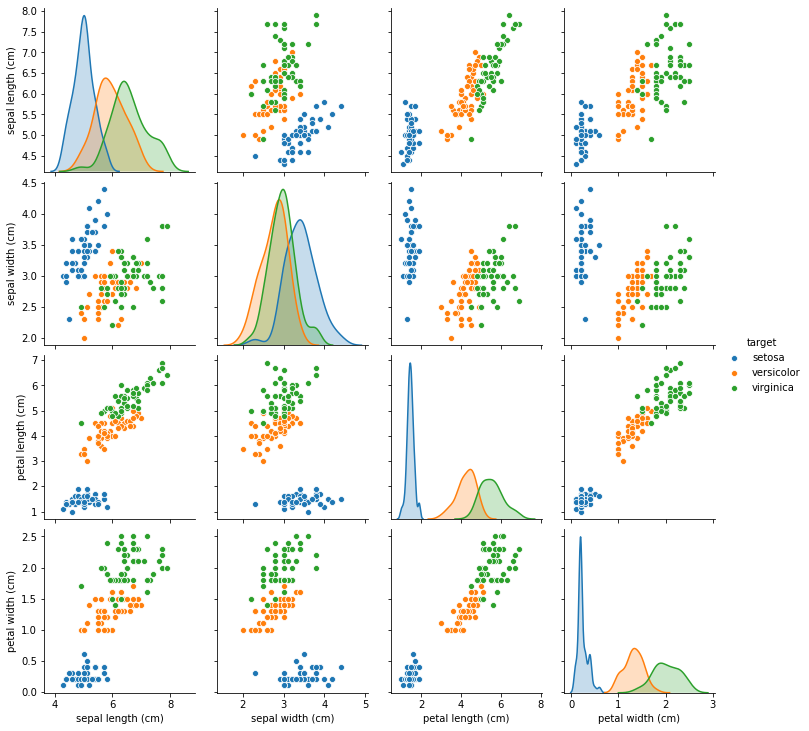

In [ ]:
sns.pairplot(iris_df, hue='target')

#### Data clustering

Below we apply a very basic algorithm to divide the data into four groups. Please note, that the procedure has no access to the `target` column - it has to produce a grouping based on flower measurements alone.

In [ ]:
import sklearn.cluster

iris_cluster = pd.Categorical(
    sklearn.cluster.KMeans(n_clusters=4).fit_predict(
    iris_df[iris.feature_names]))

Text(0.5, 1.0, 'Ground truth classes')

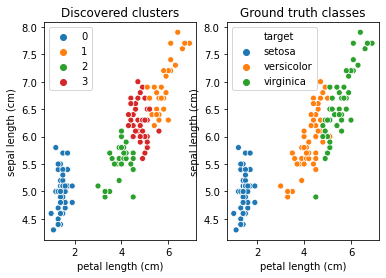

In [ ]:
plt.subplot(121)
sns.scatterplot(data=iris_df, x='petal length (cm)', y='sepal length (cm)', hue=iris_cluster)
plt.title("Discovered clusters")

plt.subplot(122)
sns.scatterplot(data=iris_df, x='petal length (cm)', y='sepal length (cm)', hue='target')
plt.title("Ground truth classes")

Please note, how the clusterer has correctly discovered that the setosa irises are very different from versicolors and virginicas. There are two other clusters which contain only versicolor or virginca flowers, however there is also a fourth cluster containing points on the boundary between versicolors and virginicas. Please note however, that the results would have been different if we asked for a different number of clusters.

#### Data projections

Finally, we will project the Iris data into two dimensions. It may seem artificial for such a small dataset as Iris, but low dimensional embeddings are often the only way to visualize complex datasets.


We will first demonstrate a PCA (principal components analysis) projection. We will learn all about it during a future lecture, for now intuitively it solves the problem of linearly projecting the data into 2D such that maximal spread of the data is preserved

Text(0.5, 0, '2nd PCA component')

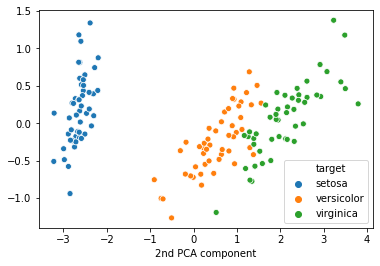

In [ ]:
import sklearn.decomposition

iris_2d = sklearn.decomposition.PCA(n_components=2).fit_transform(iris_df[iris.feature_names])

sns.scatterplot(x=iris_2d[:,0], y=iris_2d[:,1], hue=iris_df.target)
plt.xlabel('1st PCA component')
plt.xlabel('2nd PCA component')

It can be seen that PCA has selected a projection in which the 3 classes can be roughly separated, even though it did
not have access to the target class.

Then, we will construct a t-SNE embedding of the Iris data in 2D. This model tries to place each datapoint in 2D space such that neares neighbors are preserved. We see that this data visualization stresses the difference of setosas from the two other Iris species.

Text(0.5, 0, '2nd PCA component')

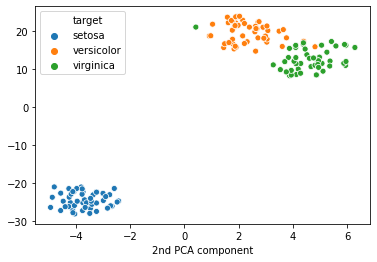

In [ ]:
sklearn.manifold

iris_2d_tsne = sklearn.manifold.TSNE(n_components=2).fit_transform(iris_df[iris.feature_names])

sns.scatterplot(x=iris_2d_tsne[:,0], y=iris_2d_tsne[:,1], hue=iris_df.target)
plt.xlabel('1st PCA component')
plt.xlabel('2nd PCA component')

## Other kinds of learning

Reinforcement learning complements supervised and unsupervised learning. For instance in bandit problems (named after the one-armed bandit slot machines) the model must discover which actions bring, in expectation, the largest rewards. This is generalized in **reinforcement learning** in which agents learn to execute actions while placed in an environment. E.g. an agent may play a computer game, controlling a character and seeing what is on the game screen. The agent is tasked with maximizing in-game rewards. However, unlike supervised learning, the rewards are stochastic and may depend on whole sequences of actions.

## Our first ML model: K Nearest Neighbors

We will now develop our first learning model for Iris: a nearest neighbor based model.

During the lecture we will use the implementation from `sklearn`, you will have to reimplement it by yourself for the first homework.

Before we begin, let's split our Iris dataset into two parts: 
- a training dataset, containing 2/3 of data samples
- a development dataset, containing the remaining 1/3 of data.

We will use the training dataset to find the nearest neighbors and the development dataset to choose important hyper-parameters of our model. Technically, we should also have a test set. We omit forming one for two reasons: 1. to have a simpler demonstration and 2. because our data is small. 

### Better test error estimators.

Performing a simple train-test split on small datasets usually is wasteful of data, and the results heavily depend on the composition of the train and test splits. Intuitively, for the Iris task, the error rate can be low if a set contains many setosas.

Rather than using a single trian-test split, one can use several ones. In the *$K$-fold cross-validation* approach, the data is divided into $K$ folds. Next, $K$ evaluation rounds are run. During each of them, one fold is used for testing, while all the other ones are used for training.

In the extreme case, when the number of folds equals the size of the dataset, we talk about leave-one-out validation or the "jackknife" estimation.

Another approach is to repeatedely randomly split the data into a training and testing set, then average the results across all runs. This is called a _bootstrap_ estimator.

Technical sidenote: we pass the data splitting function a `random_state` parameter which helps in reproducibility - each run of this code uses the same sequence of pseudo-random numbers.

In [ ]:
iris_train_df, iris_devel_df = sklearn.model_selection.train_test_split(iris_df, train_size=0.67, random_state=1234)

print(f"The training dataset contains {iris_train_df.shape[0]} samples.")
print(f"The development dataset contains {iris_devel_df.shape[0]} samples.")

The training dataset contains 100 samples.
The development dataset contains 50 samples.


We will want to visualize how the model performs. to this end our classifiers will depend only on two features: petal length and sepal lentgh.

In [ ]:
feature_cols = ['petal length (cm)', 'sepal length (cm)']
target_col = 'target'

To classify a sample the `sklearn.neighbors.KNeighborsClassifier` works as follows:
1. it computes the distance from the sample to all training data samples
2. it choses `n_neighbors` closest ones
3. chosen neighbors vote on the classification.

The `n_neighbors` parameter is very important, as we will see it controls how smooth is the decision boundary of the classifier. Thus, we will choose the best one using our development set.

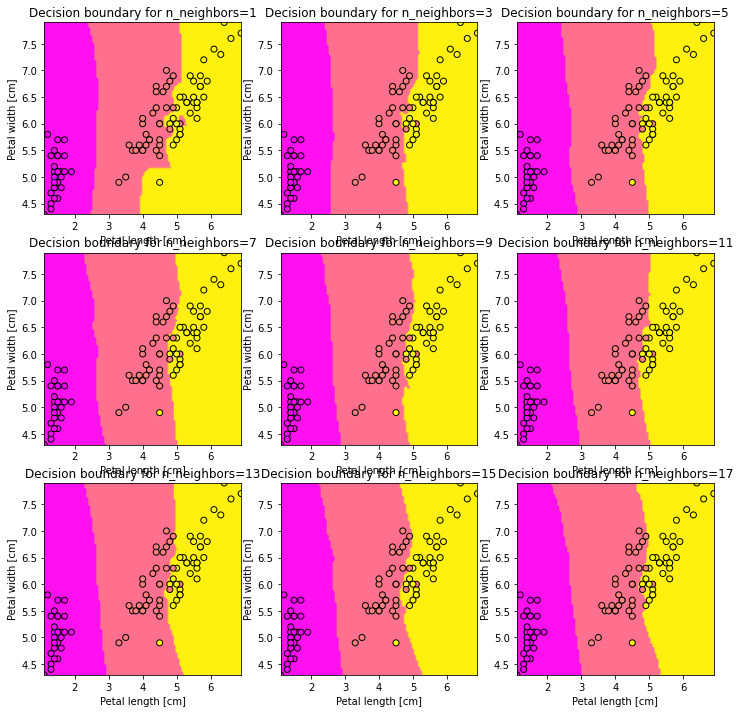

In [ ]:
# The mesh will list all points on a MESH_SIZE x MESH_SIZE grid
# We will classify them to deomnstrate how the model wirks on points
# outside the training dataset
MESH_SIZE = 100
mesh_x, mesh_y = np.meshgrid(
    np.linspace(iris_train_df[feature_cols[0]].min(), iris_train_df[feature_cols[0]].max(), MESH_SIZE),
    np.linspace(iris_train_df[feature_cols[1]].min(), iris_train_df[feature_cols[1]].max(), MESH_SIZE),
)
mesh = np.hstack([mesh_x.reshape(-1, 1), mesh_y.reshape(-1, 1)])

# Results will contain a table of number of neighbors and model accuracies 
results = []

plt.figure(figsize=(12, 12))
# Finally, in a loop we run the model with various settings of the n_neighbors hyper-parameter
for i, n_neighbors in enumerate([1, 3, 5, 7, 9, 11, 13, 15, 17]):
    # First, fit the model. For a nearest neoghbors model, this merely remebers the training datasset
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(iris_train_df[feature_cols], iris_train_df[target_col])
    
    # Now apply the model to development data and ecord the accuracy
    train_predictions = model.predict(iris_train_df[feature_cols])
    train_accuracy = sklearn.metrics.accuracy_score(iris_train_df[target_col], train_predictions)
    
    # Now apply the model to development data and ecord the accuracy
    predictions = model.predict(iris_devel_df[feature_cols])
    accuracy = sklearn.metrics.accuracy_score(iris_devel_df[target_col], predictions)
    results.append(dict(n_neighbors=n_neighbors, accuracy=accuracy, train_accuracy=train_accuracy))
    
    # Finally, plot the decision boundary
    mesh_predictions = model.predict(mesh)
    # now encode the predictions as a categorical variable, using the same dictionary of categories
    mesh_predictions = pd.Categorical(mesh_predictions, categories=iris_train_df[target_col].cat.categories)
    # the `.cat.codes` property of a categorical dataframe column changes the string values into integers
    # plt.figure(facecolor='w')
    plt.subplot(3, 3, i + 1)
    plt.title(f"Decision boundary for n_neighbors={n_neighbors}")
    plt.contourf(mesh_x, mesh_y, mesh_predictions.codes.reshape(mesh_x.shape), cmap='spring')
    plt.scatter(iris_train_df[feature_cols[0]], iris_train_df[feature_cols[1]], c=iris_train_df[target_col].cat.codes, 
                cmap='spring', linewidths=1, edgecolors='black')
    plt.xlabel('Petal length [cm]')
    plt.ylabel('Petal width [cm]')

plt.axis('tight')

# Construct a pd.DataFrame out of our results list, it will be easier to analyse it
results_df = pd.DataFrame(results)

We can see that the `n_neighbors` parameter has a large influence on the boundary: the higher it it,
the smoother the boundary. 

The influence of `n_neighbors` on model accuracy is also visible:

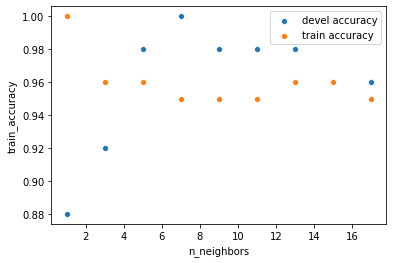

In [ ]:
sns.scatterplot(x='n_neighbors', y='accuracy', data=results_df)
sns.scatterplot(x='n_neighbors', y='train_accuracy', data=results_df)
plt.legend(['devel accuracy', 'train accuracy'])

For low values of `n_neighbors` the model has a high training accuracy
(for `n_neighbors=1` train accuracy is 100%!), but lower test accuracy. Smoothing out the decision boundary makes development accuracy 
higher, at the expense of training one. This is however good - our ultimate goal is **generalization** to new data, and not memorizing
the train set. From this perspective, choosing `n_neighbors=7` seems like a good option.

Finally, you may be puzzled why on this example the development accuracy is sometimes higher than training one. This is an artifact of 
our data split - we have very small datasets, and if one contains more examples of the easy setosa class, the model will be more accurate on it.
This issue would be resolved using cross-validation.

### Practical aspects of using K-Nearest neighbors classifiers.

K-nearest neighbors is a very simple classification algorithm. It works well if two conditions are met:
1. we have a meaningful distance measure for our data, in other words we know how to compare two samples.
2. the test data are always close (according to our distance measure) to some training data.

The first issue requires for instance proper data scaling, such that one feature does not dominate the distance computations.

The second issue is more complex and is often called "the curse of dimensionality".


#### The curse of dimensionality
When data live in many dimensions, the total volume available to data is large, and the datapoints are far away from each other. This hurts and neighborhood distance-based methods.

The following pictures try to convey some intuitions about this phenomenon.

Forse notice, how empty is the 2D space when it is populated by just three points.
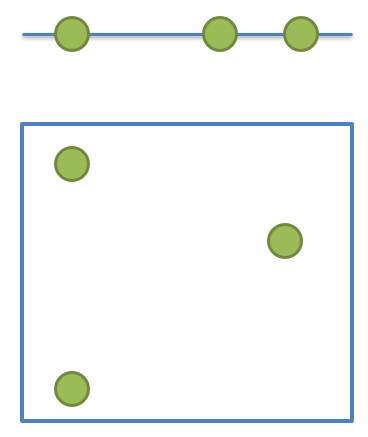

The emptiness of large dimensional spaces becomes even more severe in higher dimensional spaces. The following figure, taken from Kevin's Murphy textbook showv the fraction of volume that the small cube occupies inside the large cube. When the data is uniformily distributed in the space, this corresponds to the fraction of data in a small neighborhood.

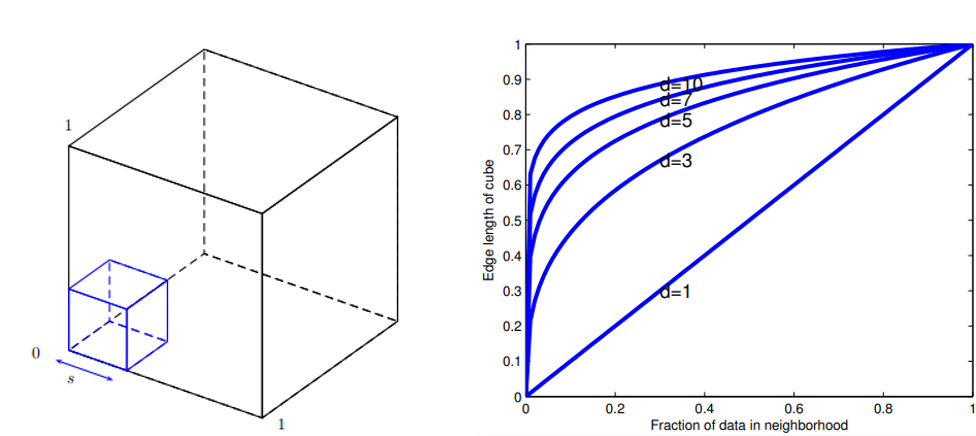

Even for moderate numbers of dimensions the small cube must be nearly as large as the large cube, to contain a non-negligible fraction of data.

This means, that in highly-dimensional spaces there are no near neoghbors, all points are far away,

#### K-NN scaling with amount of data

The impact of data dimensionality can be seen on results of the MNIST classification task.

Each MNIST sample is a small image (28x28 pixels) containing a single, centered handwritten digit:
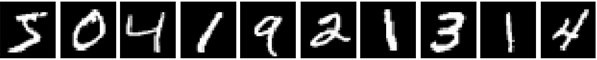

The goal si to detect which digit is in each picture.

A k-Nearest Neighors runs surprisingly well on MNIST (mainly due to the extensive image preprocessing that was applied to the images: all digits are cut out form the background, centered, and equalized in size).

The plot below shows the accurracy of a neares neighbors classifier in function of the number of training data:
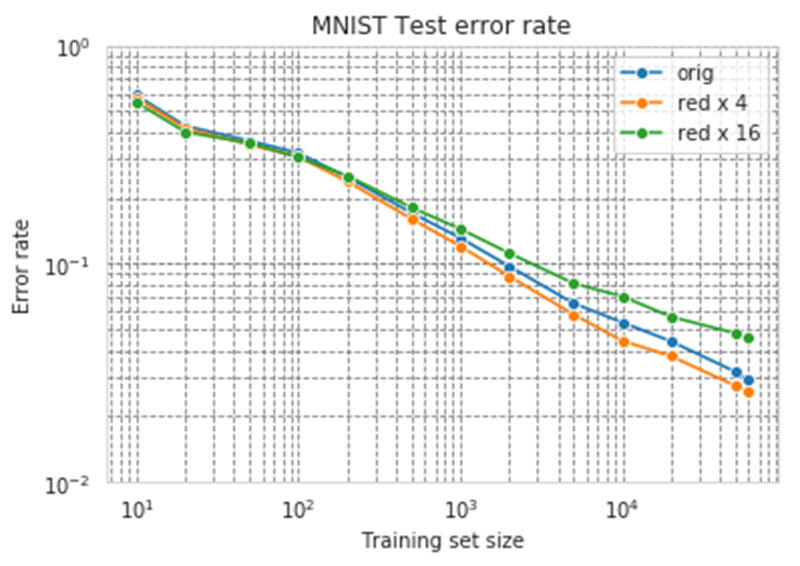

We can see that the accuracy increases (error rate drops down) when the amount of trainign data increases. moreover, there is no saturation in sight - while not economical, the model probably would keep getting better with more data.

This observation makes nearest neighbor models useful in many big data tasks - when the problem is not complictaed, and the data abundant.

However, a small performance increase is also possible by simple downscaling the data by 2, which reduces the problem's dimensionality from $28\cdot 28=784$ dimensions to $14\cdot 14 = 196$ dimensions. This slightly alleviates the curse of dimensionality. Further reductions of the size however are detrimental, we can hypothesize that when the images are reduced to 7x7 pixels, they are too small to represent the fine details which can e.g. tell apart a 1 from a 7.

## Summary

Machine learnign is implementing functions that are defined using data. It can be used whenever it is easy to get examples, but hard to devise an exact algorithm. Practical examples include computer vision, speech recognition, language processing, translation -- all state-of-the-art approaches rely heavily on data.

Moreover, machine learning is about problem solving. It thrives on good, data-driven, performance measures, and cares about models which perform the desired tasks well.